# Restaurant Data Analysis & Predictive Modeling  

##### **Level 3 Task**

Objectives:

**Task 1: Predictive Modeling**

- Built regression models to predict restaurant aggregate ratings.
- Conducted train-test splits and evaluated model performance.
- Explored various algorithms, such as linear regression, decision trees, and random forest, comparing their effectiveness.

**Task 2: Customer Preference Analysis**

- Analyzed the relationship between cuisine types and restaurant ratings.
- Identified the most popular cuisines based on customer votes.
- Discovered specific cuisines that tend to receive higher ratings.

**Task 3: Data Visualization**

- Created visualizations representing rating distributions using various chart types.
- Compared average ratings across different cuisines and cities.
- Visualized the relationship between features and the target variable for deeper insights.


## ***Task 1: Predictive Modeling***

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/nityavijayvargiya/Restaurant-Rating-Prediction-using-Data-Science/main/Dataset%20.csv")

### Building a Regression Model

In [3]:
# Creating a regression model to predict the Aggregate Rating of a Restaurant based on available features
# Importing all the necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Converting categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [5]:
# Selecting features and target variable
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

#### Split the Dataset into Training and Testing Sets

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
df.dropna(subset=features, inplace=True)

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

#### Analyzing with Different Algorithms

In [12]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n")

Model: Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949


Model: Decision Tree
Mean Squared Error: 0.20541435162613708
R-squared: 0.909751970357884


Model: Random Forest
Mean Squared Error: 0.13353063666856388
R-squared: 0.9413338125559586




In [13]:
from sklearn.ensemble import AdaBoostRegressor

# Define the AdaBoostRegressor model
ada_model = AdaBoostRegressor()

# Train the model on the training data
ada_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ada = ada_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate model accuracy
mse_ada = mean_squared_error(y_test, y_pred_ada)

# Calculate R-squared (R2) to assess the goodness of fit
r2_ada = r2_score(y_test, y_pred_ada)

# Print model performance metrics
print("AdaBoost Regressor")
print(f"Mean Squared Error: {mse_ada}")
print(f"R-squared: {r2_ada}")
print("\n")


AdaBoost Regressor
Mean Squared Error: 0.1325816778576696
R-squared: 0.9417507340719908




## ***Task 2: Customer Preference Analysis***

### Relationship Between the Type of Cuisine and the Restaurant's Rating


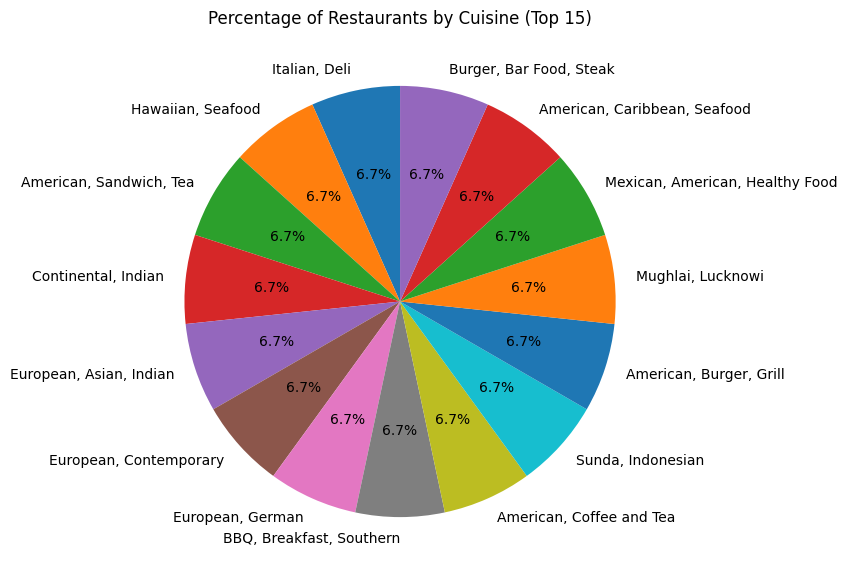

In [14]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top_cuisines = cuisine_ratings.head(15)

# Create a pie chart to visualize the number of restaurants for each cuisine
plt.figure(figsize=(15, 7))
plt.pie(top_cuisines.values, labels=top_cuisines.index, autopct="%1.1f%%", startangle=90)
plt.title('Percentage of Restaurants by Cuisine (Top 15)')
plt.show()


### Cusines with Higher Ratings

In [15]:
# Filter cuisines with average rating greater than 4.0
high_rated_cuisines = cuisine_ratings[cuisine_ratings > 4.5]

# Print the cuisines and their average ratings
for cuisine, rating in high_rated_cuisines.items():
    print(f"{cuisine}: {rating}")

Italian, Deli: 4.9
Hawaiian, Seafood: 4.9
American, Sandwich, Tea: 4.9
Continental, Indian: 4.9
European, Asian, Indian: 4.9
European, Contemporary: 4.9
European, German: 4.9
BBQ, Breakfast, Southern: 4.9
American, Coffee and Tea: 4.9
Sunda, Indonesian: 4.9
American, Burger, Grill: 4.9
Mughlai, Lucknowi: 4.9
Mexican, American, Healthy Food: 4.9
American, Caribbean, Seafood: 4.9
Burger, Bar Food, Steak: 4.9
Italian, Bakery, Continental: 4.9
World Cuisine: 4.9
American, BBQ, Sandwich: 4.9
Filipino, Mexican: 4.85
Italian, American, Pizza: 4.8
French, Japanese, Desserts: 4.8
Contemporary, Italian: 4.8
International, Italian, Southern: 4.8
European, Mediterranean, North Indian: 4.8
Beverages, International: 4.8
Indian, Continental: 4.8
Continental, Middle Eastern, Asian: 4.8
Chinese, Dim Sum: 4.75
Indian, North Indian: 4.733333333333333
Desserts, Bar Food: 4.7
American, Sandwich, Salad: 4.7
Desserts, Cafe, Mexican: 4.7
Continental, Italian, Asian, Indian: 4.7
African: 4.7
Asian, Chinese, Th

### Most Popular Cuisines by Number of Votes

In [16]:
# Identifying most popular cuisines based on number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


### Cusines with Higher Ratings

In [17]:

# Identifying cuisines with higher ratings
high_rated_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
top_rated_cuisines = high_rated_cuisines.head(10)

# Displaying the results
print("Cuisines with Higher Ratings:")
print(top_rated_cuisines)


Cuisines with Higher Ratings:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


## ***Task 3: Data Visualization***

### Distribution of Ratings

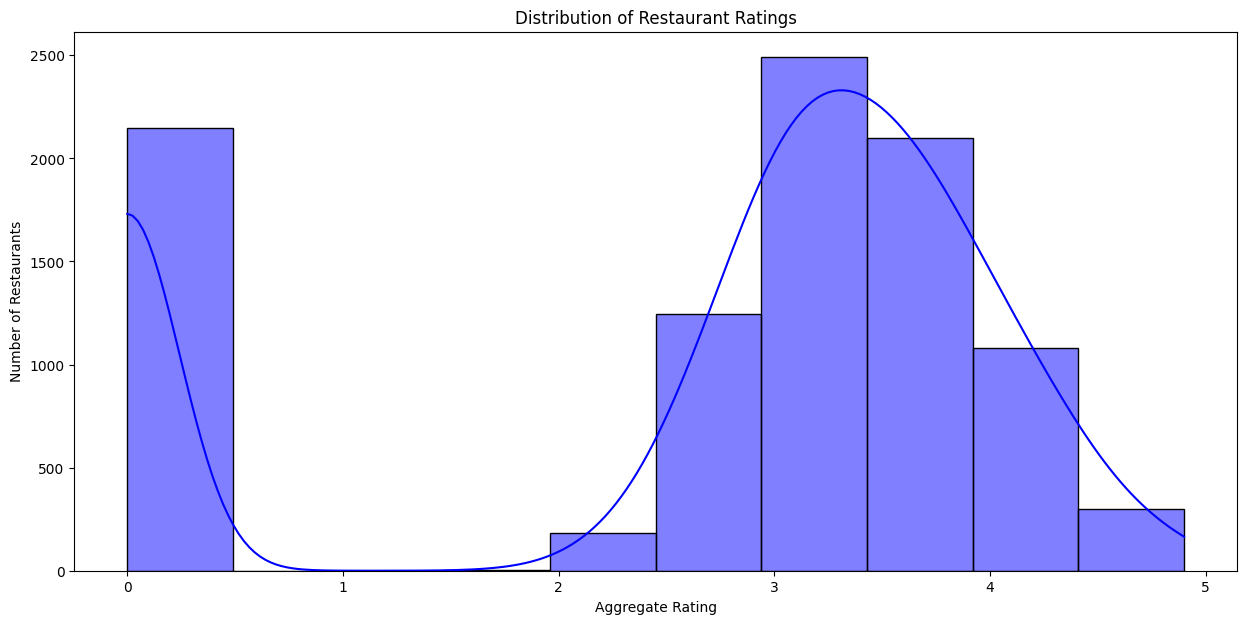

In [18]:
# Creating a histogram to visualize the distribution of ratings
plt.figure(figsize=(15, 7))
sns.histplot(df['Aggregate rating'], bins=10, color='blue', kde=True)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()


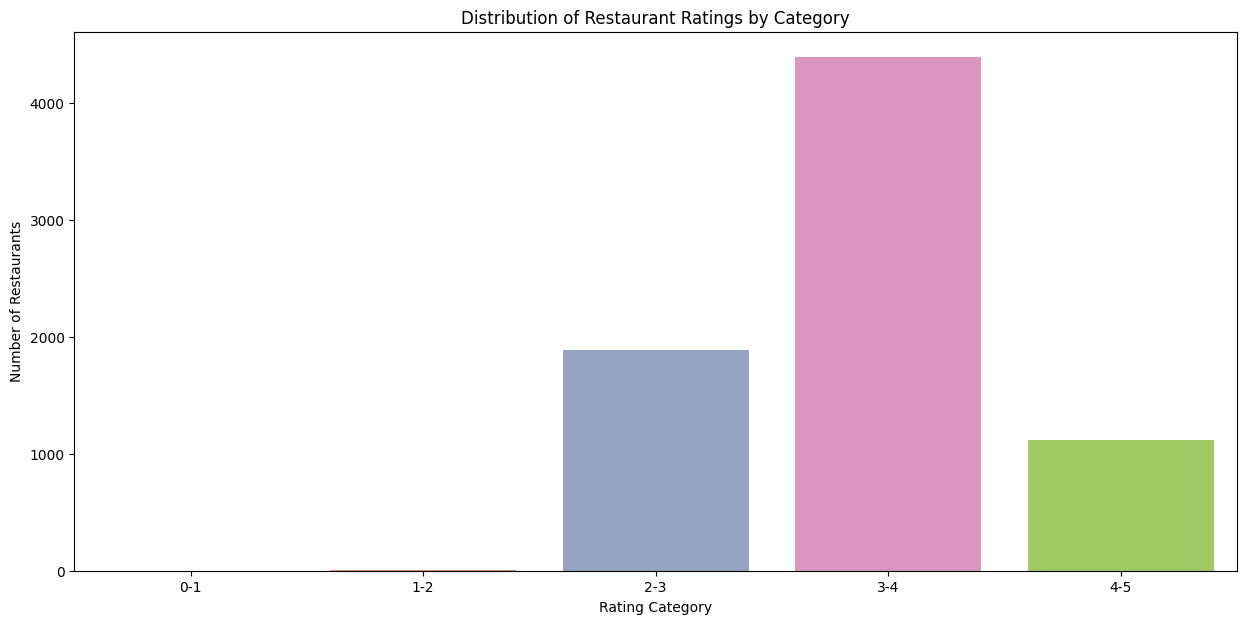

In [19]:
# Creating bins for rating categories
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

# Grouping ratings into categories
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Counting restaurants in each category
rating_counts = df['Rating Category'].value_counts()

# Creating a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set2')
plt.xlabel('Rating Category')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings by Category')
plt.show()


### Comparing Average Ratings for Different Cuisines

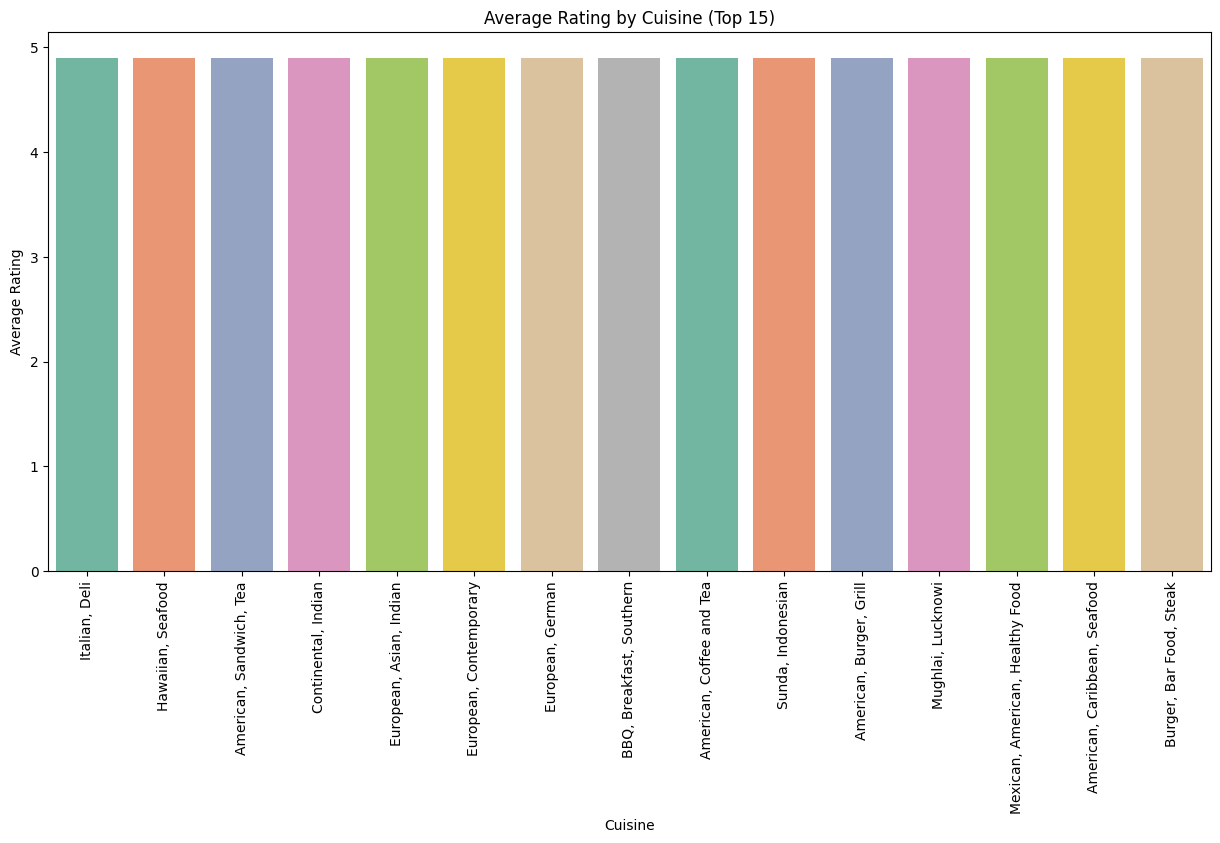

In [20]:
# Calculating average rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Selecting top 15 cuisines
top_cuisines = cuisine_ratings.head(15)

# Creating a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='Set2')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine (Top 15)')
plt.xticks(rotation=90)
plt.show()


### Comparing Average Ratings for Different Cities

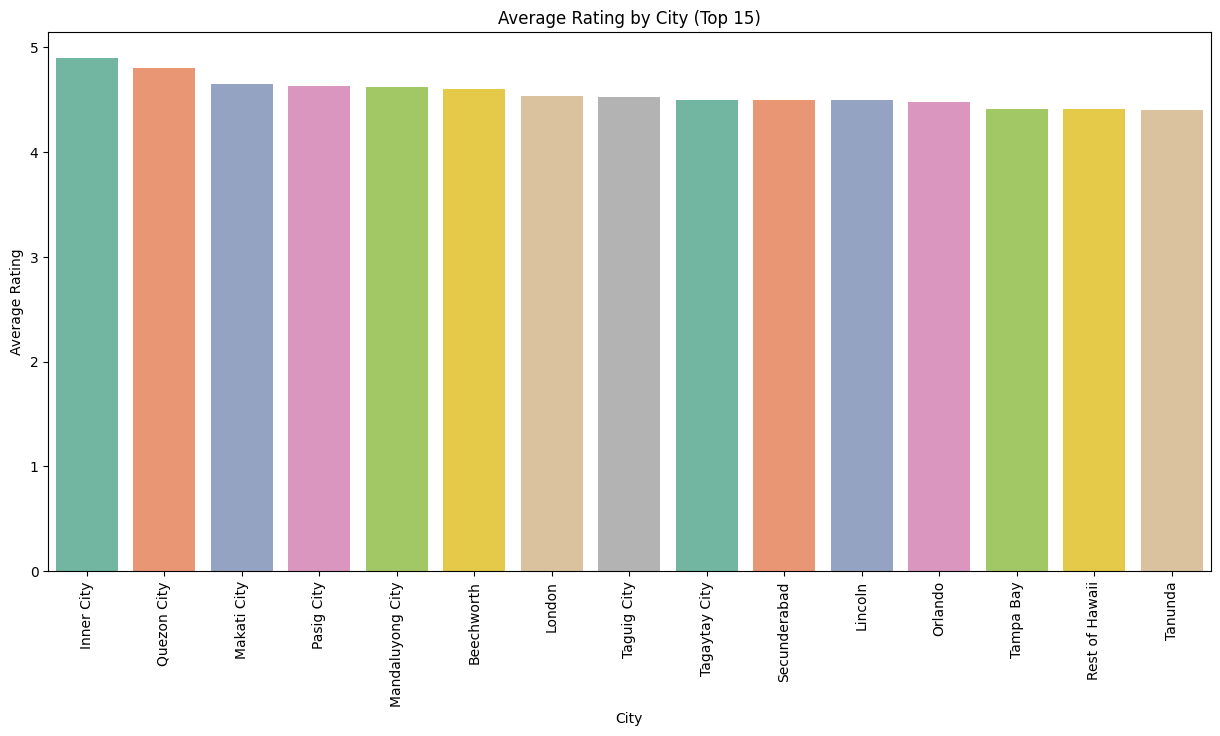

In [21]:
# Calculating average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Selecting top 15 cities
top_cities = city_ratings.head(15)

# Creating a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Set2')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating by City (Top 15)')
plt.xticks(rotation=90)
plt.show()


### Relationship Between Various Features and the Target Variable

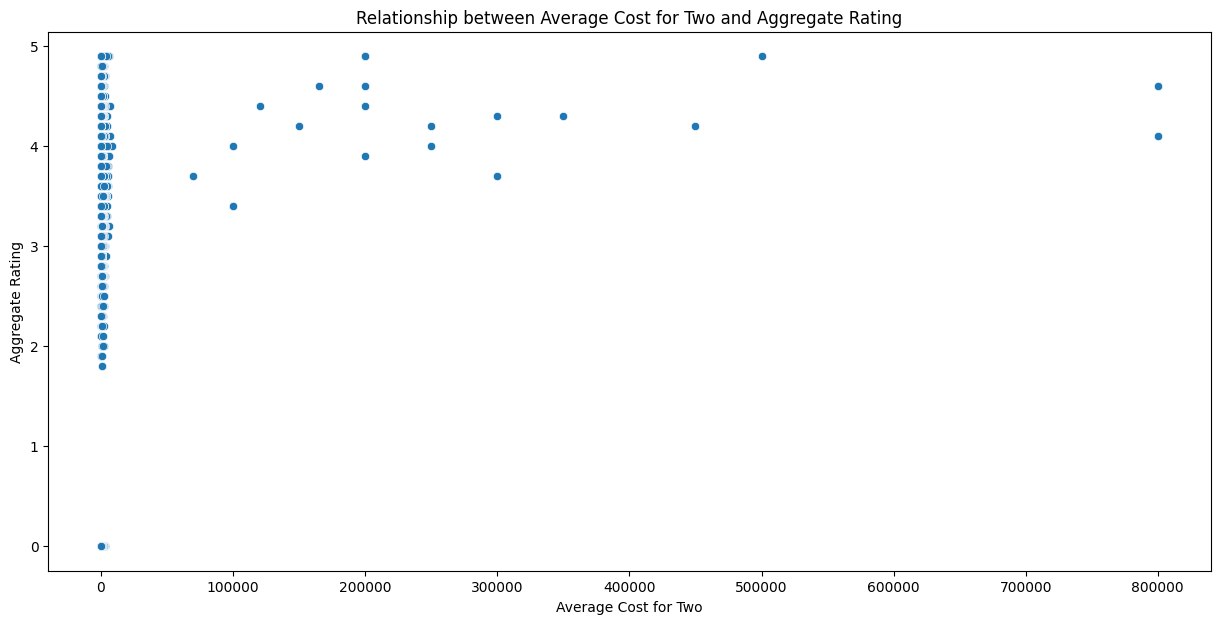

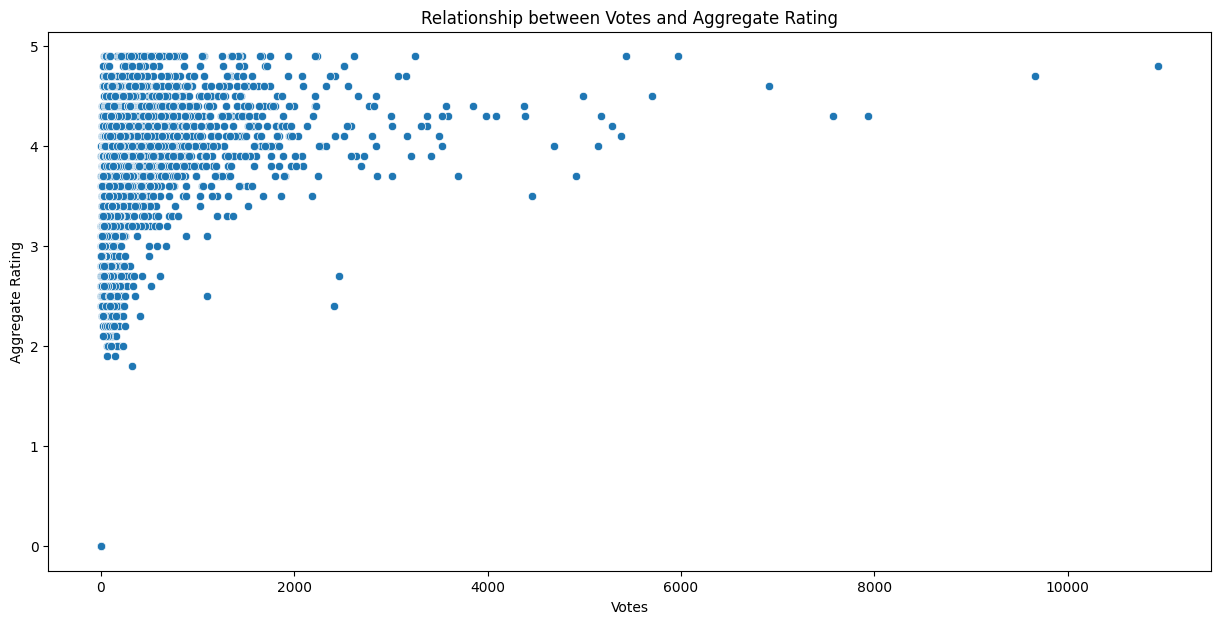

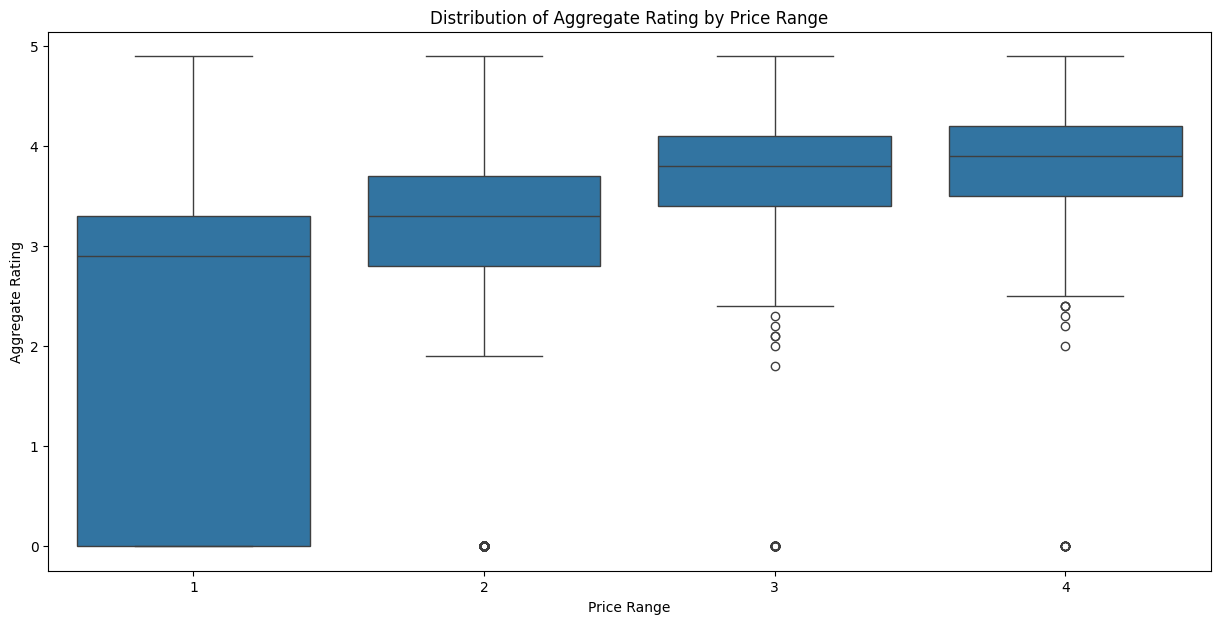

In [30]:
# Scattering plot to visualize the relationship between Average Cost for two and Aggregate Rating
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.title('Relationship between Average Cost for Two and Aggregate Rating')
plt.show()

# Scattering plot to visualize the relationship between Votes and Aggregate Rating
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Relationship between Votes and Aggregate Rating')
plt.show()

# Box plotting to visualize the distribution of Aggregate Rating for different Price Ranges
plt.figure(figsize=(15, 7))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.title('Distribution of Aggregate Rating by Price Range')
plt.show()


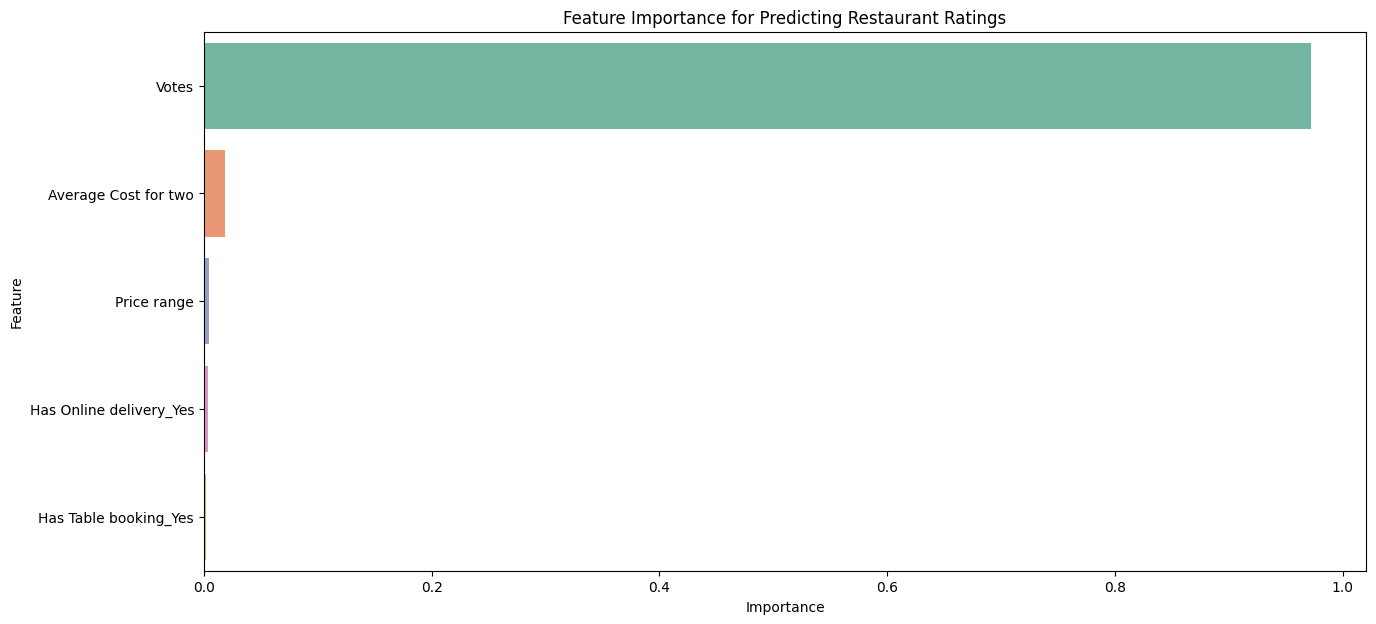

<Figure size 1000x700 with 0 Axes>

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

importances = rf_model.feature_importances_

features_df = pd.DataFrame({'Feature': features, 'Importance': importances})
features_df = features_df.sort_values('Importance', ascending=False)

# Creating a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='Set2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Restaurant Ratings')
plt.show()

# Selecting the target variable and relevant features
target_column = 'Aggregate rating'
relevant_features = ['Average Cost for two', 'Votes', 'Price range']

# Generating a heatmap
plt.figure(figsize=(10, 7))
plt.show()


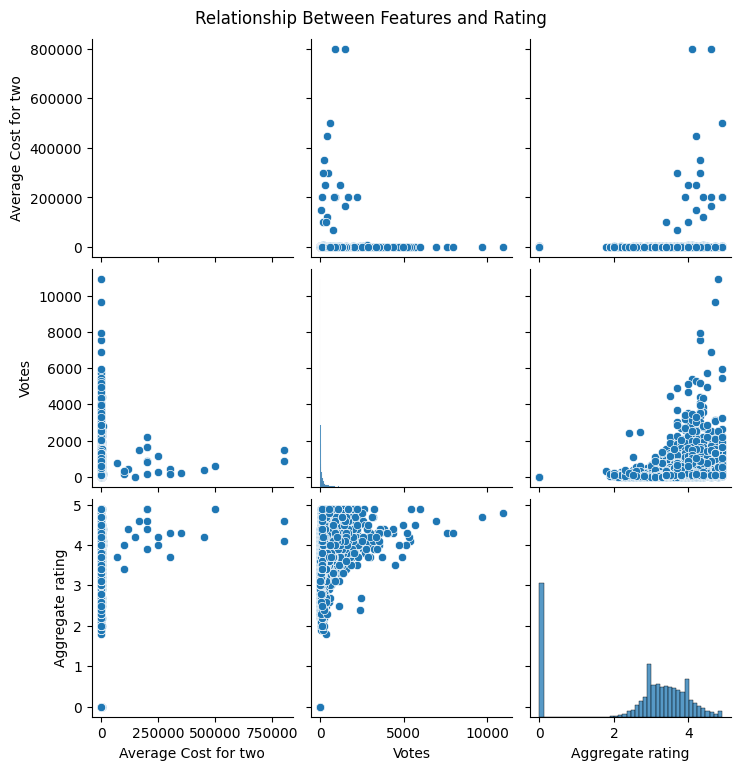

In [23]:
# Visualizing the relationship between various features and the target variable by using pair plot
import seaborn as sns
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Displaying Chart
plt.show()

# **Conclusion**

The insights which i found from the overall level 3 project:

**Predictive Modeling Insights:**

- We compared four regression models: Linear Regression, Decision Tree, Random Forest and Adabooster.
- Adabooster emerged as the most effective model for predicting restaurant ratings, achieving a low Mean Squared Error (MSE) of around 0.1330 and a high R-squared value of approximately 0.9415. These metrics indicate a strong fit between the model's predictions and the actual ratings.

**Customer Preference Analysis Findings:**

- Cuisines like cafes, Mughlai, North Indian, and fast food have a strong influence on restaurant ratings, but their performance can vary considerably.
- North Indian and Chinese restaurants show a wider range of ratings, with some excelling and others falling short. In contrast, cafes and fast food tend to have more consistent ratings, suggesting a more standardized experience.
- North Indian, Mughlai, and Chinese cuisines are the clear leaders in terms of voting volume, indicating their widespread presence and customer interest.
- Diners seem to have a strong preference for Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines, reflected in their consistently high average ratings.

**Data Visualization Highlights:**

-  Our visualizations reveal a negative skew in restaurant ratings. This means there are more restaurants clustered around average scores, with fewer on the extremes of very high or very low ratings.
- When it comes to cuisine, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian stand out. These cuisines boast the highest average ratings, suggesting a strong preference among diners.
- While average rating is a valuable metric, location also plays a role. Visualizations can highlight geographic trends. Cities like Inner City, Quezon City, and Makati City might be popular for reasons beyond just having the highest average ratings. There could be a higher concentration of specific cuisines or unique dining experiences that attract customers.
- Visualizations often confirm a positive correlation between the number of votes (reviews) and average rating. This suggests that more popular restaurants tend to have more reviews, which can influence the overall average score.